In [2]:
pip install seaborn

     |████████████████████████████████| 292 kB 7.7 MB/s eta 0:00:01
     |████████████████████████████████| 7.3 MB 69.9 MB/s eta 0:00:01
     |████████████████████████████████| 33.2 MB 77.3 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 900 kB/s eta 0:00:011
     |████████████████████████████████| 3.0 MB 64.9 MB/s eta 0:00:01
     |████████████████████████████████| 890 kB 86.4 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.0.15_1/libexec/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


First I import all the necessary packages 

In [1]:
import numpy as np
import seaborn as sns
import matplotlib
#from cf_matrix import make_confusion_matrix
sns.set_context('talk')

from matplotlib import pyplot as plt

Then I define the confusion matrix that I want to visualize

In [2]:
cf_matrix = np.array([[168,  67],
                      [ 71, 776]])

Then I start with the first improvement that is turning the contingency table into a heatmap so that each entry of the matrix gets associated to a different hue of colour. This allows to give immediate visual cues about the magnitude of each subset of the contingency table. 

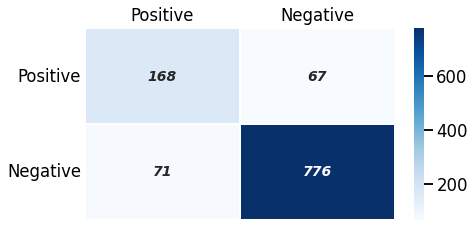

In [59]:
#BASIC HEATMAP mantaining the original structure

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
labels = [f"{v1}" for v1 in group_counts]
labels = np.asarray(labels).reshape(2,2)

axis_labels = ["Positive", "Negative"]

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

ax = sns.heatmap(cf_matrix, annot=labels, annot_kws={"style": "italic", "weight": "bold", "size":14}, fmt='', cmap='Blues', linewidth=0.1, yticklabels=axis_labels, xticklabels=axis_labels)

ax.tick_params(left=False, bottom=False)
plt.yticks(rotation=0)
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')
ax.tick_params(length=0)


plt.show()


Although this visualization is already more informative than the baseline confusion matrix, there is still room for improvement. In particular, here I remove the outside writing and put is as labels within each quadrant, together with the associated percentage.

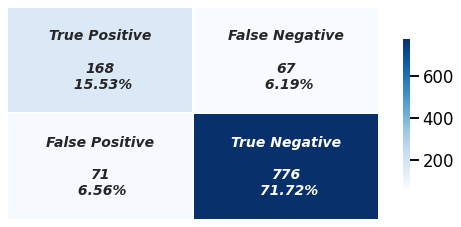

In [6]:
#HEATMAP WITH PERCENTAGES AND LABELS
group_names = ['True Positive','False Negative','False Positive','True Negative']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

#to separate the labels from the numbers and make it more readable 
labels = [f"{v1}\n\n{v2}\n {v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)


#to plot the heatmap
ax = sns.heatmap(cf_matrix, 
                 annot=labels, annot_kws={"style": "italic", "weight": "bold", "size":14}, 
                 fmt='', 
                 cmap='Blues', 
                 linewidth=0.1, 
                 yticklabels=False, xticklabels=False,
                 cbar_kws={"shrink": .70}
                )

#eliminate the ticks
ax.tick_params(left=False, bottom=False)

#plt.yticks(rotation=0)

#bring the x axis on top
ax.tick_params(length=0)

#ax.xaxis.tick_top() 
#ax.xaxis.set_label_position('top')

plt.show()

Separate the color of the diagonal with the off diagonal to distinguish between auspicable and non auspicable elements

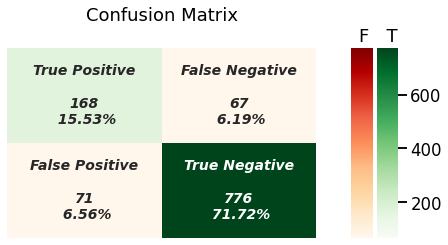

In [27]:
#prepare the base
fig = plt.figure()

#define the labels
group_names = ['True Positive','False Negative','False Positive','True Negative']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n\n{v2}\n {v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)



#define the two masks (GridSpec to have a better layout)
vmin = np.min(cf_matrix)
vmax = np.max(cf_matrix)
off_diag_mask = np.eye(*cf_matrix.shape, dtype=bool)
gs0 = matplotlib.gridspec.GridSpec(1,2, width_ratios=[20,3], hspace=0.05)
gs00 = matplotlib.gridspec.GridSpecFromSubplotSpec(1,2, subplot_spec=gs0[1], hspace=0)

ax = fig.add_subplot(gs0[0])
cax1 = fig.add_subplot(gs00[0])
cax2 = fig.add_subplot(gs00[1])
cax2.set_title("F   T", loc="right")

#and plot the heatmaps
sns.heatmap(cf_matrix, 
            annot=labels, annot_kws={"style": "italic", "weight": "bold", "size":14},fmt='', 
            mask=~off_diag_mask, 
            cmap='Greens', 
            vmin=vmin, vmax=vmax, 
            ax=ax, cbar_ax=cax2, 
            yticklabels=False, xticklabels=False)

sns.heatmap(cf_matrix, 
            annot=labels, annot_kws={"style": "italic", "weight": "bold", "size":14},fmt='', 
            mask=off_diag_mask, 
            cmap='OrRd', 
            vmin=vmin, vmax=vmax, 
            ax=ax, cbar_ax=cax1, cbar_kws=dict(ticks=[]), 
            yticklabels=False, xticklabels=False)

#eliminate tick marks 
ax.tick_params(left=False, bottom=False)

#add the title 
ax.set(title="Confusion Matrix\n")

plt.show()


The visualizaton can be made more informative by including a set of performance metrics within the panel. In particular, here I add the four basic matrix rates (TPR, TNR, PPV, NPV) as well as accuracy and $F_1$ score

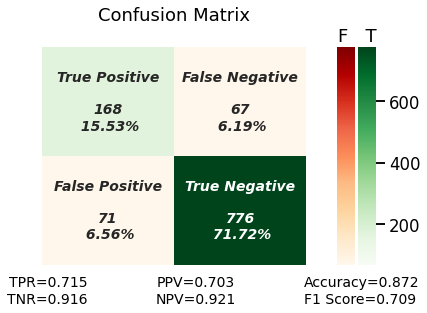

In [23]:
#prepare the base
fig = plt.figure()

#define the labels
group_names = ['True Positive','False Negative','False Positive','True Negative']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n\n{v2}\n {v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)



#define the two masks (GridSpec to have a better layout)
vmin = np.min(cf_matrix)
vmax = np.max(cf_matrix)
off_diag_mask = np.eye(*cf_matrix.shape, dtype=bool)
gs0 = matplotlib.gridspec.GridSpec(1,2, width_ratios=[20,3], hspace=0.05)
gs00 = matplotlib.gridspec.GridSpecFromSubplotSpec(1,2, subplot_spec=gs0[1], hspace=0)

ax = fig.add_subplot(gs0[0])
cax1 = fig.add_subplot(gs00[0])
cax2 = fig.add_subplot(gs00[1])
cax2.set_title("F   T", loc="right")

#and plot the heatmaps
sns.heatmap(cf_matrix, 
            annot=labels, annot_kws={"style": "italic", "weight": "bold", "size":14},fmt='', 
            mask=~off_diag_mask, 
            cmap='Greens', 
            vmin=vmin, vmax=vmax, 
            ax=ax, cbar_ax=cax2, 
            yticklabels=False, xticklabels=False)

sns.heatmap(cf_matrix, 
            annot=labels, annot_kws={"style": "italic", "weight": "bold", "size":14},fmt='', 
            mask=off_diag_mask, 
            cmap='OrRd', 
            vmin=vmin, vmax=vmax, 
            ax=ax, cbar_ax=cax1, cbar_kws=dict(ticks=[]), 
            yticklabels=False, xticklabels=False)

#eliminate tick marks 
ax.tick_params(left=False, bottom=False)

#add the title 
ax.set(title="Confusion Matrix\n")


#ADDING THE METRICS
#compute the accuracy (=sum of diagonal divided by total observations)
accuracy  = np.trace(cf_matrix) / float(np.sum(cf_matrix))

#show the statistics when it's a 2x2 matrix (binary classification)
if len(cf_matrix)==2:
    TPR = cf_matrix[0,0]/np.sum(cf_matrix[:1])   #sensitivity/recall
    TNR = cf_matrix[1,1]/np.sum(cf_matrix[1,:2]) #specificity  
    PPV = cf_matrix[0,0]/np.sum(cf_matrix[:,0])  #precision
    NPV = cf_matrix[1,1]/np.sum(cf_matrix[:,1])  

    f1_score  = 2*PPV*TPR / (PPV + TPR)
    true_cm_rate = "\n\nTPR={:0.3f}\nTNR={:0.3f}".format(TPR,TNR)
    false_cm_rate = "\n\nPPV={:0.3f}\nNPV={:0.3f}".format(PPV,NPV)
    total_cm_rate = "\n\nAccuracy={:0.3f}\nF1 Score={:0.3f}".format(accuracy,f1_score)
else:
    total_cm_rate = "\n\nAccuracy={:0.3f}".format(accuracy)

plt.text(-15,-50, true_cm_rate, ha='right', wrap =True, fontsize=14)   
plt.text(-9,-50, false_cm_rate, ha='center', wrap =True, fontsize=14) #add text
plt.text(-3,-50, total_cm_rate, ha='left', wrap =True, fontsize=14)

plt.show()


Hence, the final function to plot the whole panel is

In [3]:
def make_confusion_matrix(cf, 
                          title="Confusion Matrix", 
                          true_cm_rate = True, false_cm_rate = True,
                          count=True, 
                          percentage= True, 
                          cbar = True):
    """
    cf - input matrix
    title - default is "Confusion Matrix", can be modified to cater the specific application
    
    true_cm_rate - default is True to make them show, one can put False to focus on different metrics
    false_cm_rate - ""
    total_cm_rate - ""
    
    count - default is True to show the cardinality of the subset
    percentage - default is True "
    cbar - ""
    """
    fig = plt.figure()

    #define the labels
    group_names = ['True Positive','False Negative','False Positive','True Negative']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cf.flatten()/np.sum(cf)]

    labels = [f"{v1}\n\n{v2}\n {v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)



    #define the two masks (GridSpec to have a better layout)
    vmin = np.min(cf)
    vmax = np.max(cf)
    off_diag_mask = np.eye(*cf.shape, dtype=bool) #*sequence unpacking and np.eye makes the diagonal true
    gs0 = matplotlib.gridspec.GridSpec(1,2, width_ratios=[20,3], hspace=0.05) #define the cbar for one color
    gs00 = matplotlib.gridspec.GridSpecFromSubplotSpec(1,2, subplot_spec=gs0[1], hspace=0) #define the cbar for the other

    ax = fig.add_subplot(gs0[0])
    cax1 = fig.add_subplot(gs00[0])   #add the subplots
    cax2 = fig.add_subplot(gs00[1])
    cax2.set_title("F   T", loc="right") #add like a title for the cbars

    #and plot the heatmaps
    sns.heatmap(cf, 
                annot=labels, annot_kws={"style": "italic", "weight": "bold", "size":14},fmt='', 
                mask=~off_diag_mask, 
                cmap='Greens', 
                vmin=vmin, vmax=vmax, 
                ax=ax, cbar_ax=cax2, 
                yticklabels=False, xticklabels=False)

    sns.heatmap(cf_matrix, 
                annot=labels, annot_kws={"style": "italic", "weight": "bold", "size":14},fmt='', 
                mask=off_diag_mask, 
                cmap='OrRd', 
                vmin=vmin, vmax=vmax, 
                ax=ax, cbar_ax=cax1, cbar_kws=dict(ticks=[]), 
                yticklabels=False, xticklabels=False)

    #eliminate tick marks 
    ax.tick_params(left=False, bottom=False)

    #add the title 
    ax.set(title="Confusion Matrix\n")


    #CODE FOR THE PERFORMANCE METRICS
    accuracy  = np.trace(cf_matrix) / float(np.sum(cf_matrix))

    if len(cf)==2:
        TPR = cf[0,0]/np.sum(cf[:1])   #sensitivity/recall
        TNR = cf[1,1]/np.sum(cf[1,:2]) #specificity  
        PPV = cf[0,0]/np.sum(cf[:,0])  #precision
        NPV = cf[1,1]/np.sum(cf[:,1])  

        f1_score  = 2*PPV*TPR / (PPV + TPR)
        total_cm_rate = "\n\nAccuracy={:0.3f}\nF1 Score={:0.3f}".format(accuracy,f1_score)
    else:
        total_cm_rate = "\n\nAccuracy={:0.3f}".format(accuracy)
        
    if true_cm_rate: 
        true_cm_rate = "\n\nTPR={:0.3f}\nTNR={:0.3f}".format(TPR,TNR)
        plt.text(-15,-50, true_cm_rate, ha='right', wrap =True, fontsize=14)  
        
    if false_cm_rate:
        false_cm_rate = "\n\nPPV={:0.3f}\nNPV={:0.3f}".format(PPV,NPV)
        plt.text(-9,-50, false_cm_rate, ha='center', wrap =True, fontsize=14) 
        
    if total_cm_rate:
        plt.text(-3,-50, total_cm_rate, ha='left', wrap =True, fontsize=14)

    plt.show()
    

Qui ulteriori mglioramenti potrebbero essere di rendere tutto molto più interattivo con dei widget per il calcolo delle metriche (da valutare se ho tempo)

SEGUE CODICE ORIGINALE DELL'ARTICOLO MEDIUM:

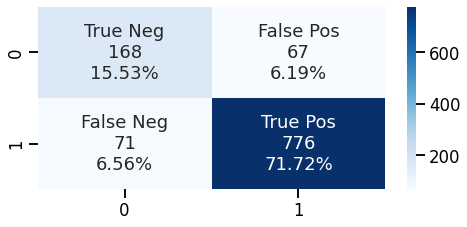

In [64]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.show()

In [6]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    Visualizes a sklearn Confusion Matrix using a Seaborn heatmap, added labels and performance metrics .
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)